In [1]:
import random
import time

import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA

import draw_digits as game

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:

def img2vector(filename):

    returnVect = np.zeros((1, 1024))
    fr = open(filename)

    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])

    return returnVect
def plotNumbers(trainingMat, hwLabels):
    
    plt.scatter(trainingMat[:, 0], trainingMat[:, 1],
            c=hwLabels, edgecolor='none', alpha=0.5)
    plt.set_cmap(plt.cm.get_cmap('nipy_spectral',10))

    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()
    plt.show()

def drawYourOwnDigits():
    game.play()
    myDigits = listdir('myDigits')
    m = len(myDigits)
    myDigitMat = np.zeros((m, 1024))
    classNumbers = []
    for i in range(m):
        fileNameStr = myDigits[i]

        classNumbers.append(int(fileNameStr.split('_')[0]))
        myDigitMat[i,:] = img2vector('myDigits/%s' % (fileNameStr))
    return myDigitMat, classNumbers

In [20]:


hwLabels = []
trainingFileList = listdir('trainingDigits')
random.shuffle(trainingFileList)
testFileList = trainingFileList[0:200]
trainingFileList = trainingFileList[201:len(trainingFileList)-1]

m = len(trainingFileList)

trainingMat = np.zeros((m, 1024))
TestMat = np.zeros((200, 1024))
classNumbers = []

for i in range(m):
    fileNameStr = trainingFileList[i]

    classNumber = int(fileNameStr.split('_')[0])
    hwLabels.append(classNumber)
    trainingMat[i,:] = img2vector('trainingDigits/%s' % (fileNameStr))

for i in range(200):

    fileNameStr = testFileList[i]

    classNumbers.append(int(fileNameStr.split('_')[0]))

    TestMat[i,:] = img2vector('trainingDigits/%s' % (fileNameStr))

print(trainingMat.shape)
print(TestMat.shape)

(1732, 1024)
(200, 1024)


In [14]:
TestMat, classNumbers = drawYourOwnDigits()

what is the number?
2
file saved


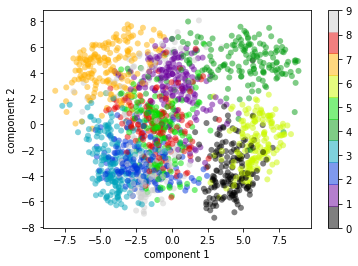

(1732, 10)
(200, 10)


In [21]:
NumOfDimensions = 10



pca_model = PCA(n_components=NumOfDimensions)
pca_model.fit(trainingMat)
trainingMat = pca_model.transform(trainingMat)
TestMat = pca_model.transform(TestMat)
plotNumbers(trainingMat, hwLabels)


print(trainingMat.shape)
print(TestMat.shape)

In [22]:
n_neighbors = 30


neigh =KNN(n_neighbors, algorithm = 'auto')
neigh.fit(trainingMat, hwLabels)
mTest = len(TestMat)



errorCount = 0.0
start_time = time.time()
classifierResult = neigh.predict(TestMat)
for i in range(mTest):
    if(classifierResult[i] != classNumbers[i] or mTest < 15):
        print("classified: %d\ real result:%d" % (classifierResult[i], int(classNumbers[i])))
        if(classifierResult[i] != classNumbers[i]):
            errorCount += 1.0
end_time = time.time()
print("Time used to predict was %g seconds" % (end_time - start_time))
print("Total misclassified data : %d \n in rate of%f%%" % (errorCount, errorCount/mTest * 100))


classified: 2\ real result:8
classified: 9\ real result:4
classified: 7\ real result:4
classified: 5\ real result:3
classified: 9\ real result:2
classified: 7\ real result:3
classified: 7\ real result:4
Time used to predict was 0.0179791 seconds
Total misclassified data : 7 
 in rate of3.500000%
